# Evaluation

Now let's try to do a feature by feature comparision between the generated data and the actual data. We will use python's table_evaluator library to compare the features.

We call the visual_evaluation method to compare the actual data(data) and the generated data(samples).

In [ ]:
from table_evaluator import load_data, TableEvaluator
import pandas as pd
data = pd.read_csv('MIMIC-IV/los_predict.csv')
samples = pd.read_csv('MIMIC-IV/los_ctgan.csv')
samples.head()

,admission_type,insurance,marital_status,ethnicity,LOS,blood,circulatory,congenital,digestive,endocrine,...,misc,muscular,neoplasms,nervous,pregnancy,prenatal,respiratory,skin,ICU,NICU
0,EU OBSERVATION,Other,UNKNOWN (DEFAULT),WHITE,1.126728,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ELECTIVE,Other,UNKNOWN (DEFAULT),WHITE,32.781691,0.0,0.0,7.0,1.0,0.0,...,2.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
2,EW EMER.,Medicare,MARRIED,BLACK/AFRICAN AMERICAN,4.421723,1.0,4.0,0.0,1.0,7.0,...,2.0,0.0,1.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0
3,EW EMER.,Medicare,MARRIED,WHITE,4.537336,0.0,2.0,0.0,0.0,2.0,...,1.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,URGENT,Medicare,UNKNOWN (DEFAULT),WHITE,13.075068,0.0,0.0,7.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


103443 100000


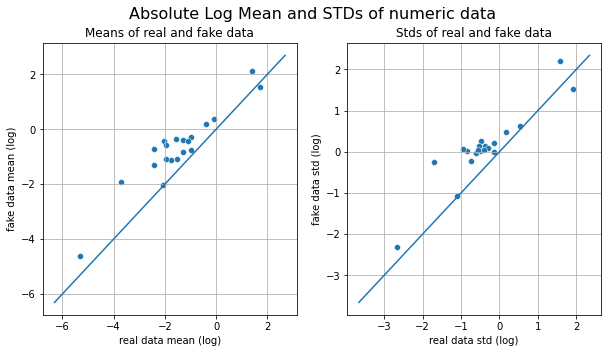

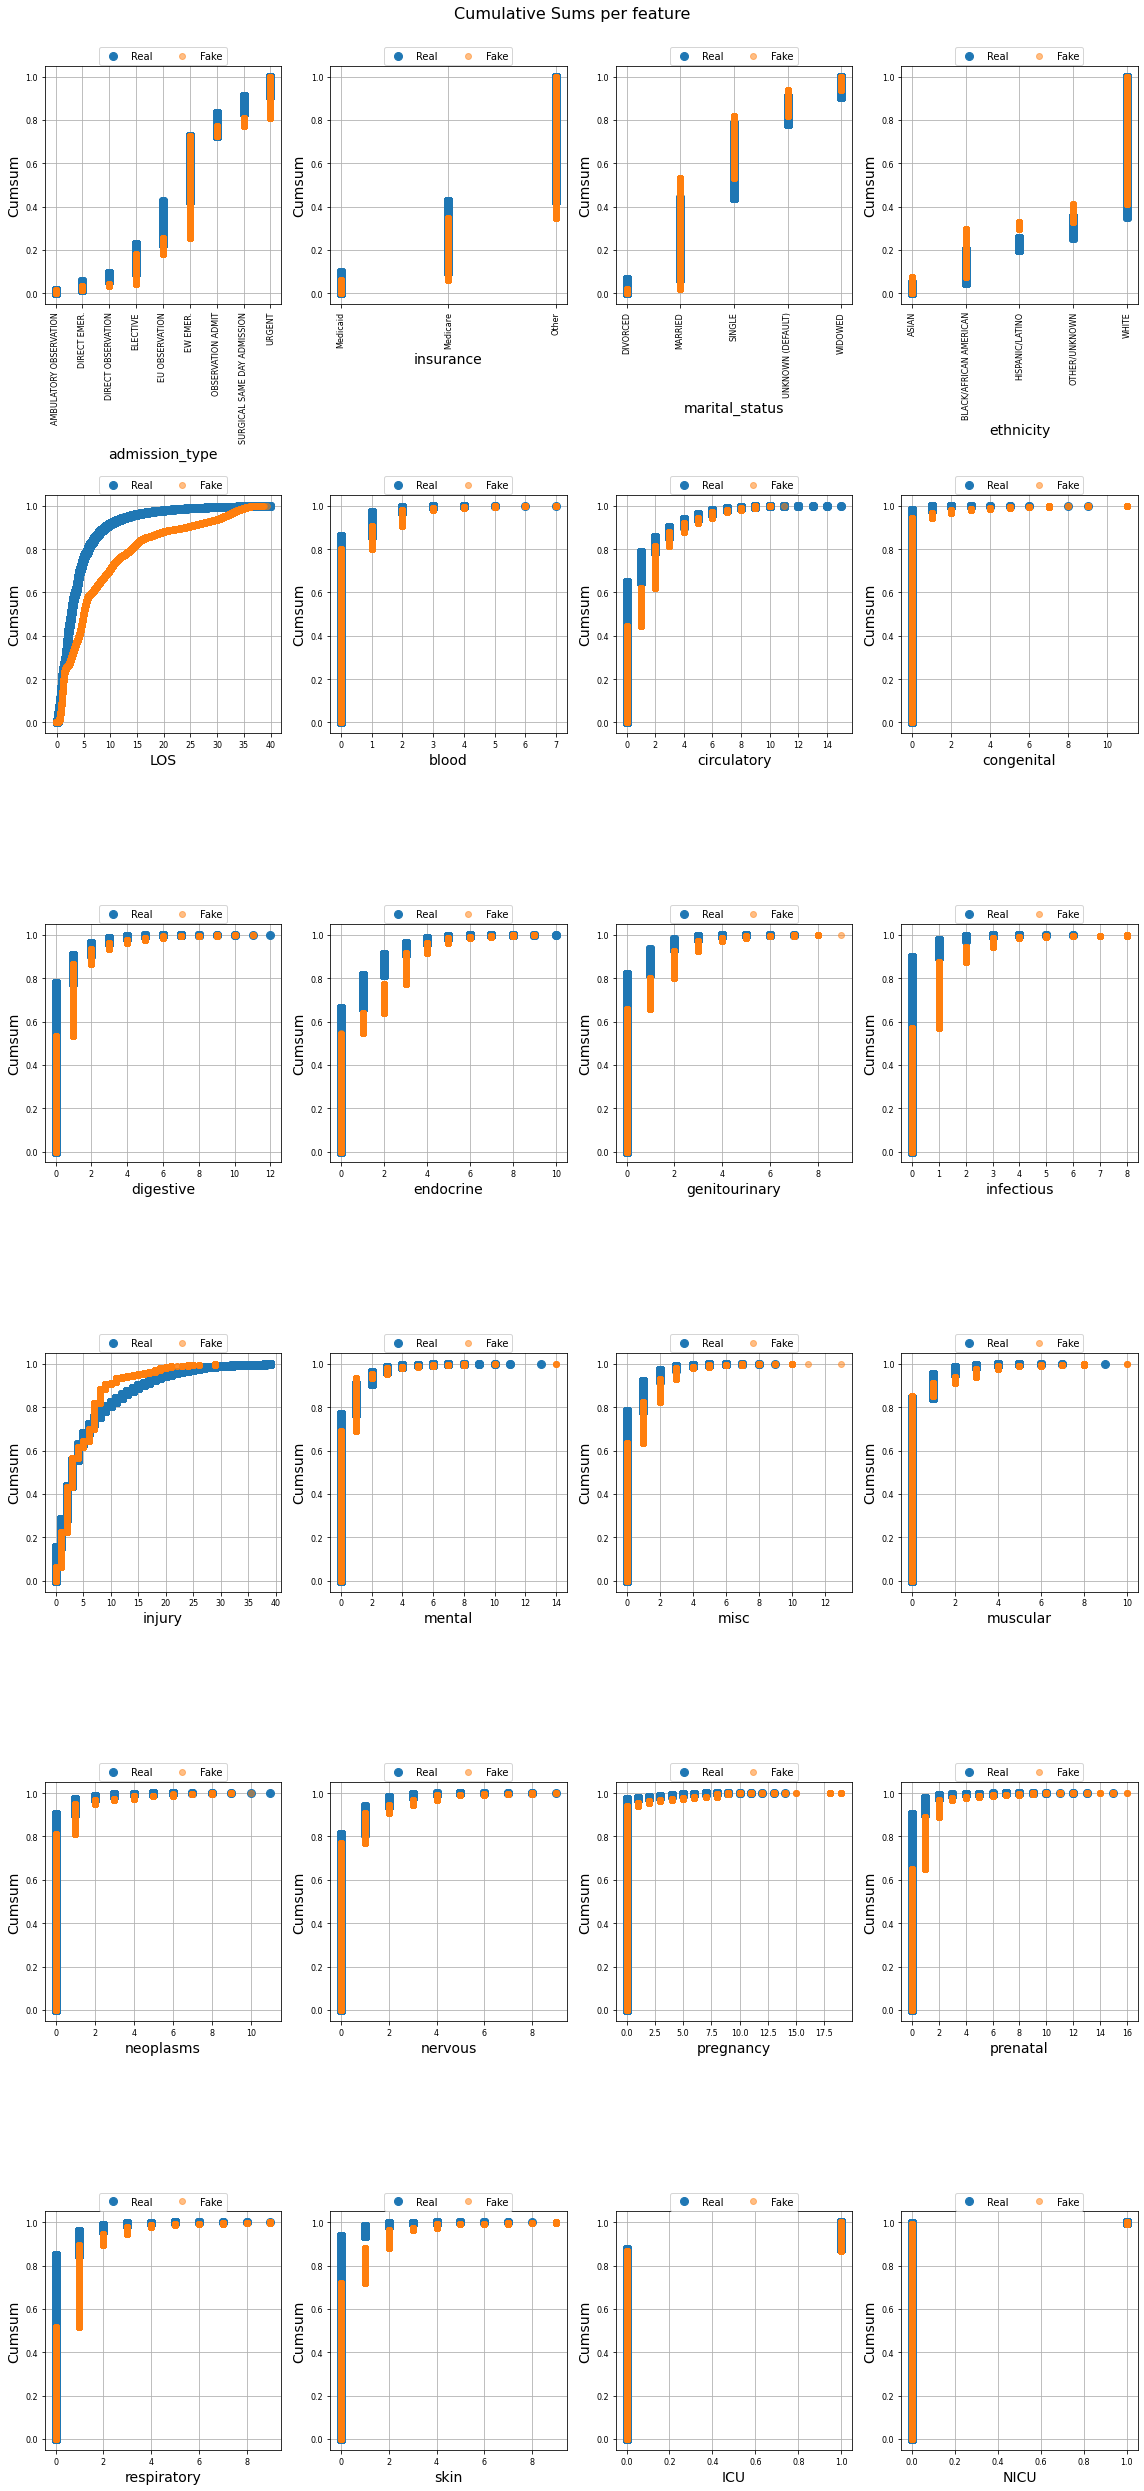

ValueError: cannot reindex from a duplicate axis

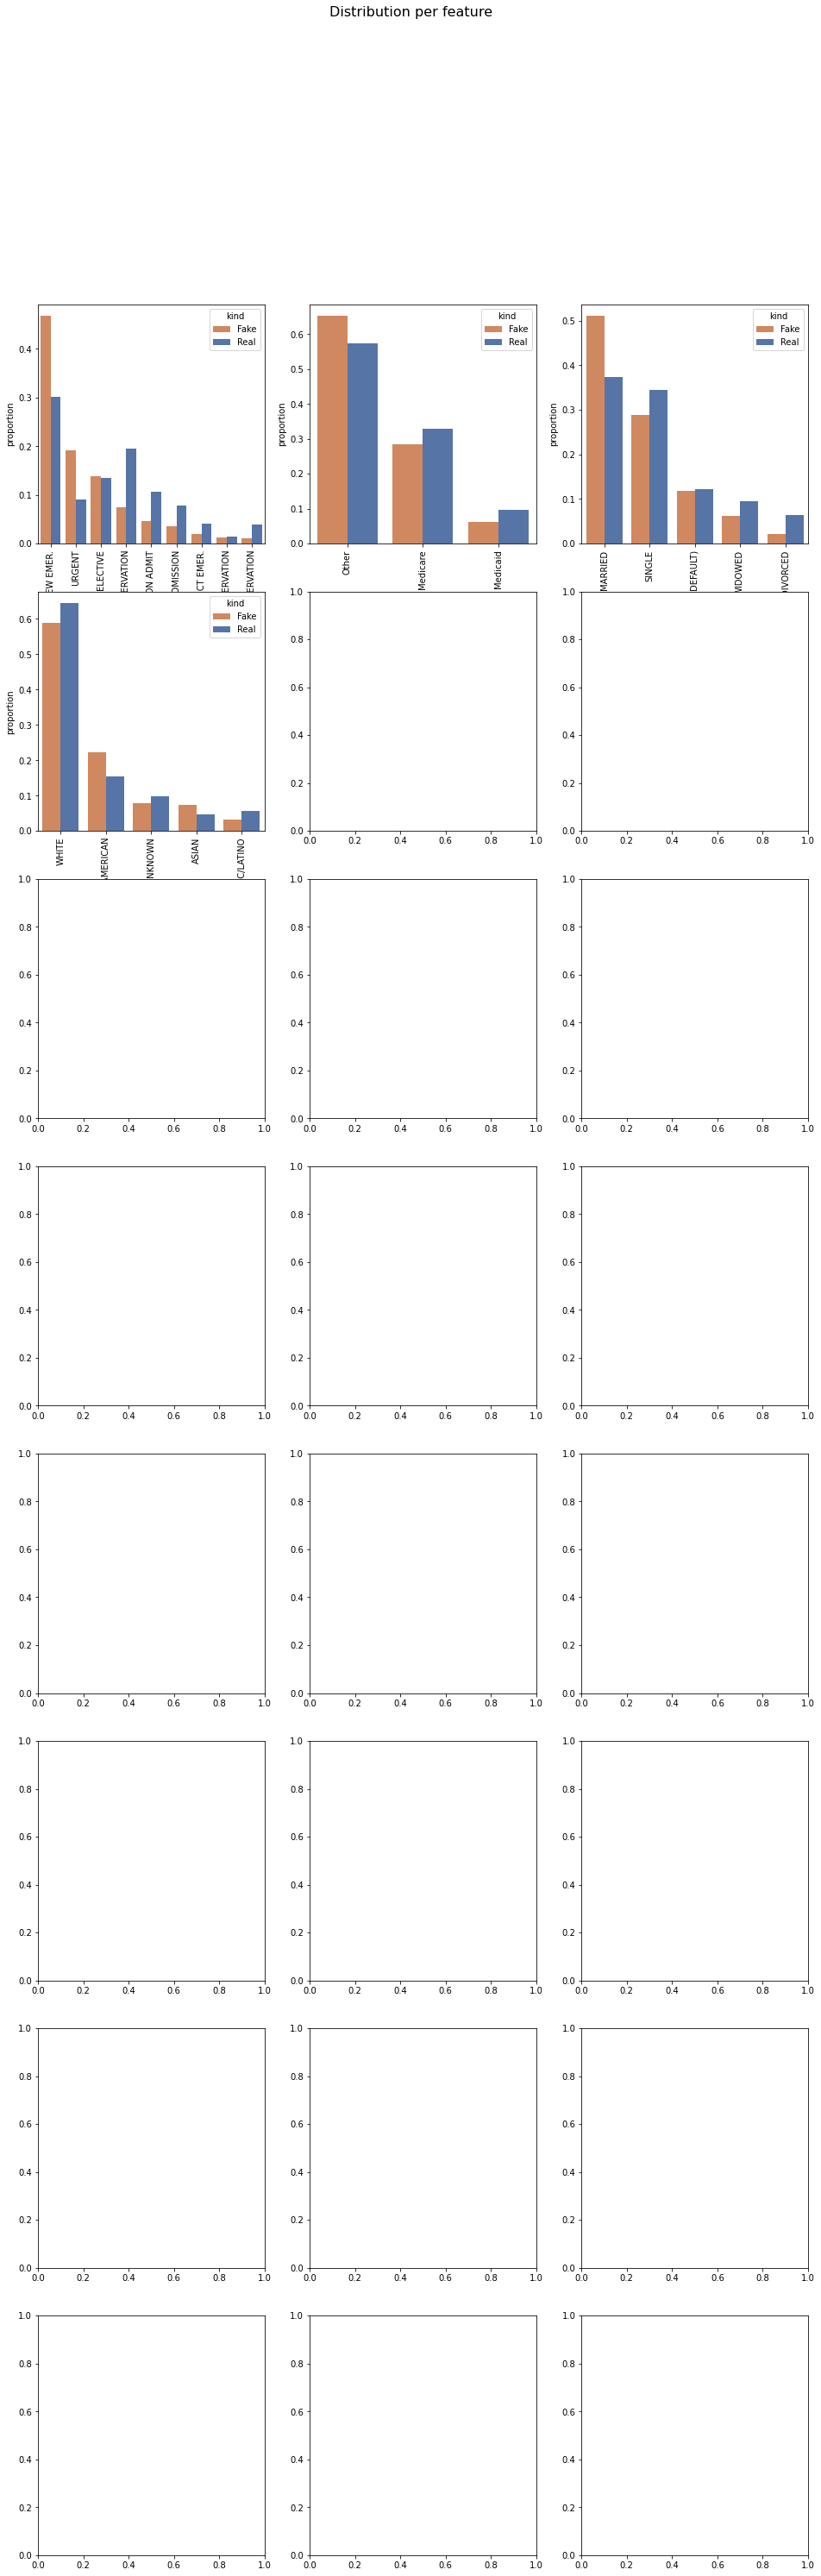

In [6]:
cat_cols = ['admission_type', 'insurance', 'marital_status', 'ethnicity', 'LOS',
            'blood', 'circulatory', 'congenital', 'digestive', 'endocrine',
            'genitourinary', 'infectious', 'injury', 'mental', 'misc', 'muscular',
            'neoplasms', 'nervous', 'pregnancy', 'prenatal', 'respiratory', 'skin',
            'ICU', 'NICU']

print(len(data), len(samples))
table_evaluator =  TableEvaluator(data, samples)

table_evaluator.visual_evaluation()

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# p and q have to be probability distributions, which means they should be sum of 1.
def kl_divergence(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

from scipy.spatial import distance
def cos_similarity(p,q):
    return 1 - distance.cosine(p, q)

In [8]:
data.keys()

Index(['admission_type', 'insurance', 'marital_status', 'ethnicity', 'LOS',
       'blood', 'circulatory', 'congenital', 'digestive', 'endocrine',
       'genitourinary', 'infectious', 'injury', 'mental', 'misc', 'muscular',
       'neoplasms', 'nervous', 'pregnancy', 'prenatal', 'respiratory', 'skin',
       'ICU', 'NICU'],
      dtype='object')

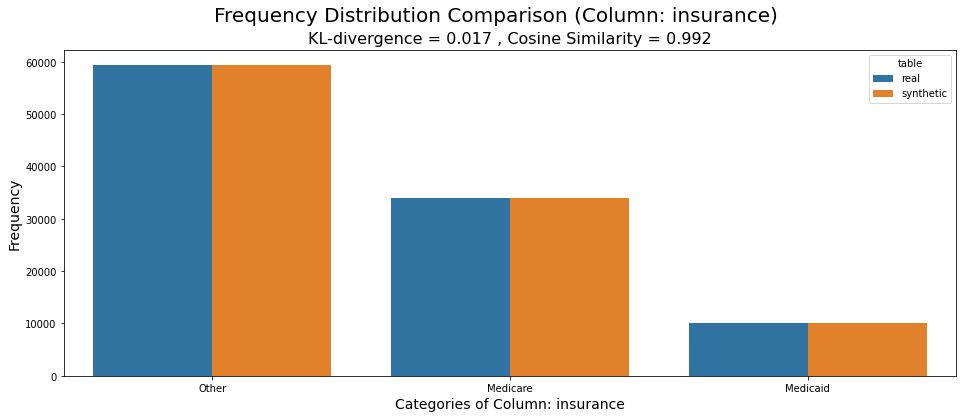

In [9]:
def discret_probs(column):
    counts = column.value_counts()
    freqs ={counts.index[i]: counts.values[i] for i in range(len(counts.index))} 
    probs = []
    for k,v in freqs.items():
        probs.append(v/len(column))
    return np.array(probs)


def cat_plot(colname, realdata, syndata):
    real_p = discret_probs(realdata[colname])
    syn_p = discret_probs(syndata[colname])
    real_plt = pd.DataFrame({colname:realdata[colname], 'table': 'real'})
    syn_plt = pd.DataFrame({colname:realdata[colname], 'table': 'synthetic'})
    df_plt = pd.concat([real_plt, syn_plt], axis=0, sort=False)
    kl = kl_divergence(np.array(real_p), np.array(syn_p))
    cos_sim = cos_similarity(real_p,syn_p)

    plt.figure(figsize = [16, 6])
    plt.title('KL-divergence = %1.3f , Cosine Similarity = %1.3f'% (kl, cos_sim),
              fontsize = 16)
    sns.countplot(x=colname, hue="table", data=df_plt)
    plt.suptitle('Frequency Distribution Comparison (Column: {})'.format(colname),
                 fontsize = 20)
    plt.xlabel('Categories of Column: {}'.format(colname),fontsize = 14)
    plt.ylabel("Frequency",fontsize = 14)
    
cat_plot('insurance', data, samples)

LOS
circulatory
congenital
digestive
endocrine
genitourinary
infectious
injury
mental
misc
muscular
neoplasms
pregnancy
prenatal
skin


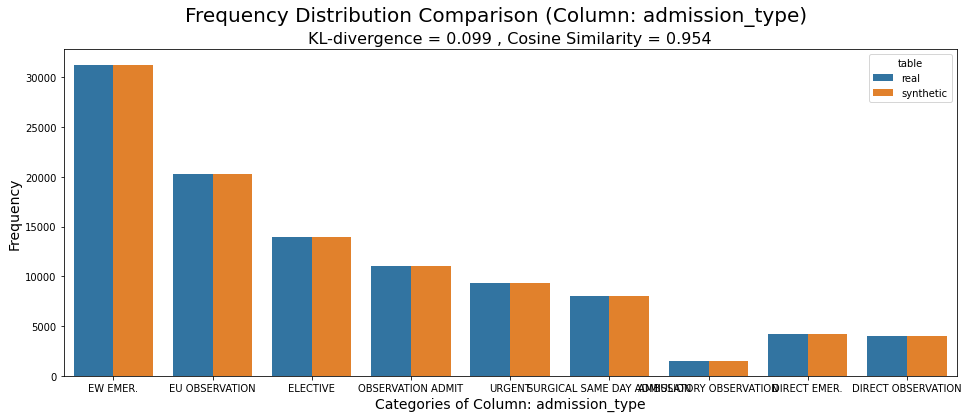

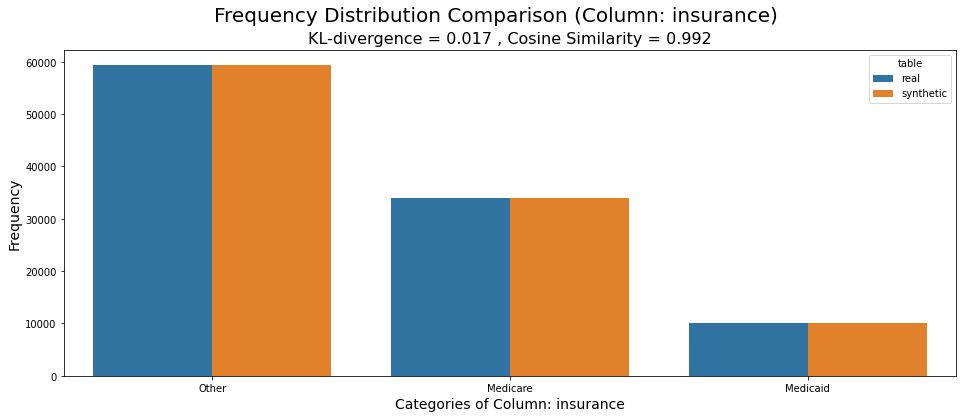

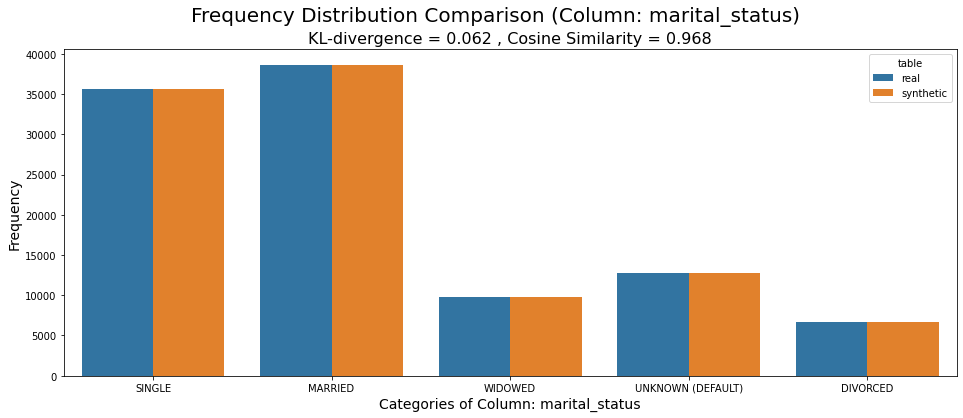

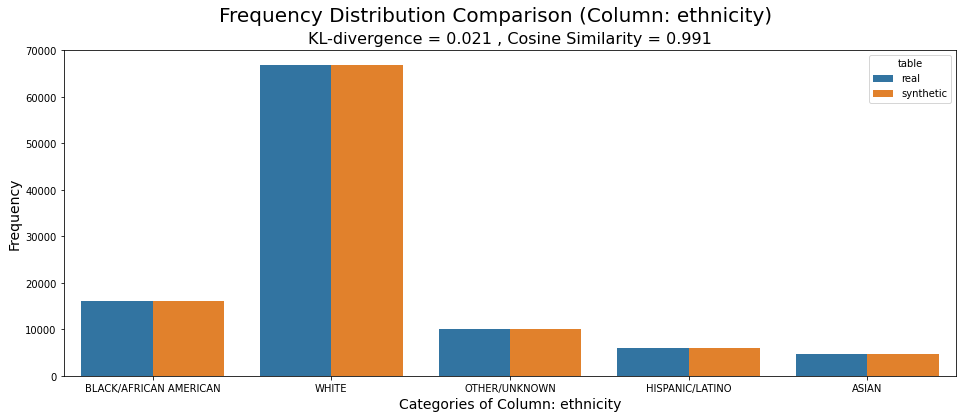

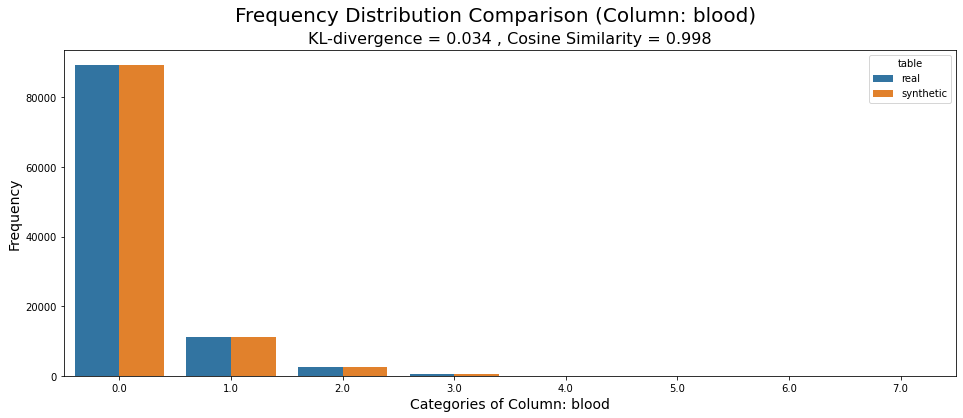

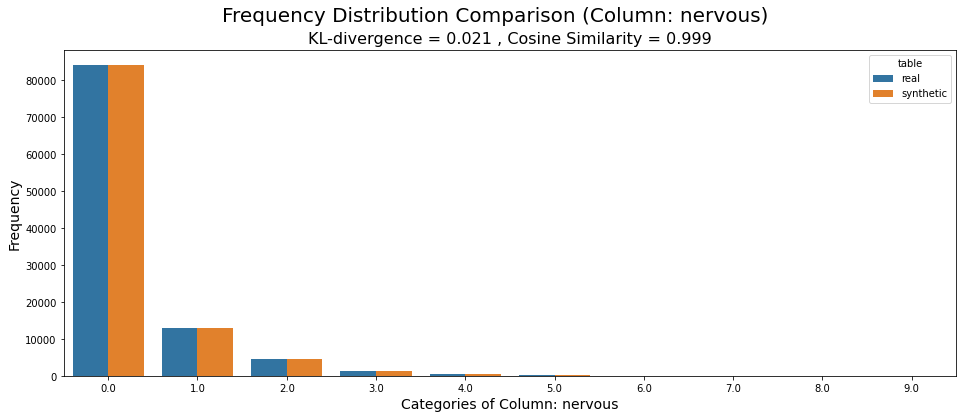

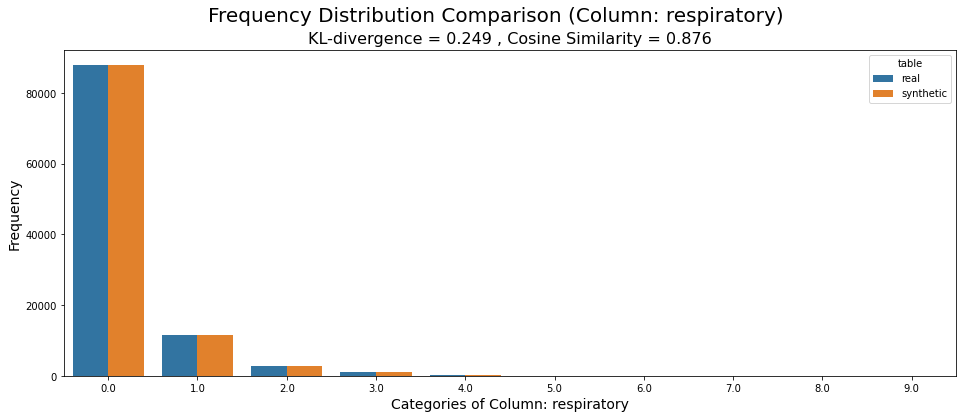

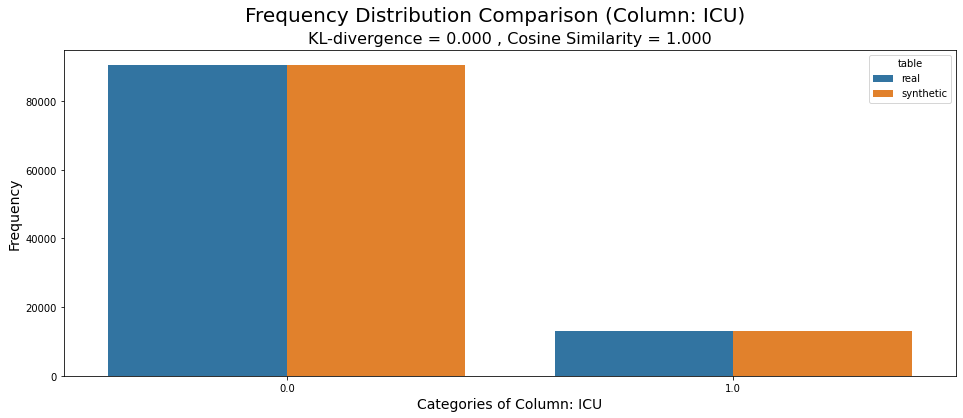

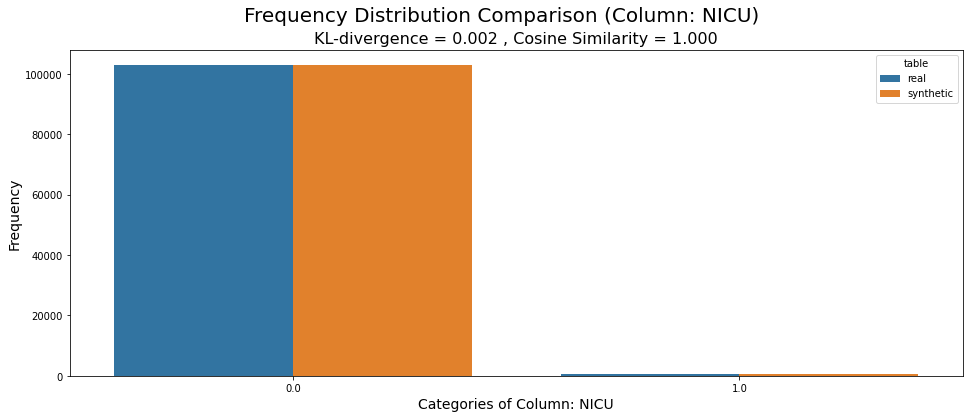

In [10]:
for i in ['admission_type', 'insurance', 'marital_status', 'ethnicity', 'LOS',
       'blood', 'circulatory', 'congenital', 'digestive', 'endocrine',
       'genitourinary', 'infectious', 'injury', 'mental', 'misc', 'muscular',
       'neoplasms', 'nervous', 'pregnancy', 'prenatal', 'respiratory', 'skin',
       'ICU', 'NICU']:
  try:
    cat_plot(i, data, samples)
  except:
    print(i)